## GROUP MEMBERS
- **Alex Chen** 
- **Paige Maple** 
- **Sam Valentine**

### Business Understanding (1.5 pts)

1. **Overview of the Dataset and Its Purpose**  
   The **Education Inequality Data** dataset ([Kaggle link](https://www.kaggle.com/datasets/shamimhasan8/education-inequality-data)) provides information on about 1,000 schools in the United States. It includes data such as **average test scores, funding per student, student–teacher ratio, and other school-level indicators**. The purpose of collecting this kind of data is to highlight patterns of inequality in the education system and to provide a basis for studying how different factors affect student performance. By bringing together financial, structural, and outcome-related information, the dataset allows us to explore whether students in underfunded or overcrowded schools are at a disadvantage compared to those in better-resourced schools.  

2. **Prediction Task**  
   For our project, the **prediction task** is centered on the **average test score**. Instead of treating it as a continuous number, we will convert it into a **binary classification problem**: a school “passes” if its average test score is **≥ 70 (coded as 1)** and “fails” if the average is **below 70 (coded as 0)**. This framing allows us to study the conditions that increase the likelihood of passing or failing. While funding per student is an important feature, it is **not the only one that matters**. Other variables such as student–teacher ratio, overall enrollment, or demographic factors may also play a role in determining whether a school performs well. By including multiple features, we can better understand how resources and other conditions collectively influence student success.  

3. **Why This Matters and Performance Expectations**  
   The results of this prediction task would be useful for **educators, school administrators, policymakers, and nonprofits**. These groups care about identifying schools that are likely to struggle so they can allocate resources, design interventions, and advocate for more equitable policies. A model that can predict pass/fail outcomes with reasonably **high accuracy** would provide valuable insights, even if it is not perfect. For example, being able to correctly classify most schools would still help highlight patterns of inequality and guide decision-making. Importantly, since funding is not the sole determinant of student performance, the model could also reveal how other school characteristics contribute to success or failure, offering a more balanced and realistic understanding of the factors behind educational outcomes.  


### Data Understanding (3 pts)

#### Part 1 (1.5 pts)

In [1]:
import numpy as np
import pandas as pd

# load the dataset
df = pd.read_csv("../dataset/education_inequality_data.csv")

# change avg_test_score to categorical data (1 for pass and 0 for fail) and change the name to pass/fail
df["avg_test_score_percent"] = (df["avg_test_score_percent"] >= 70).astype(int)
df = df.rename(columns={"avg_test_score_percent": "pass/fail"})

# show basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   pass/fail                1000 non-null   int32  
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 90.0+ KB


,id,school_name,state,school_type,grade_level,funding_per_student_usd,pass/fail,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
0,1,Bowman High School,Michigan,Private,High,9575.80,0,17.5,30.0,44.0,74.1,3.44
1,2,Foster High School,Michigan,Charter,Middle,16733.10,1,24.2,93.5,40.1,79.9,8.67
2,3,Henson High School,New York,Public,Middle,24890.74,1,27.0,58.1,35.8,51.1,14.75
3,4,Weaver High School,Texas,Private,Elementary,6857.49,1,26.2,82.7,72.0,55.5,13.45
4,5,King Elementary School,Michigan,Public,Elementary,16910.73,0,20.2,41.4,16.1,57.8,6.98


We created a table to show the 12 attributes within the dataset along with their desired data type and a short discussion of each attribute.  

| Column                   | Data Type                 | Discussion                                                                 |
|---------------------------|---------------------------|----------------------------------------------------------------------------|
| id                        | Categorical (identifier)  | The school id is just a unique identifier and should not affect the pass/fail rate. |
| school_name               | Categorical (nominal)     | Each school name is unique; it does not influence performance directly and is not useful for prediction. |
| state                     | Categorical (nominal)     | Indicates the U.S. state; may capture regional differences in funding and outcomes. |
| school_type               | Categorical (nominal)     | Public, Private, or Charter; school type may influence resources and outcomes. |
| grade_level               | Categorical (ordinal)     | Elementary, Middle, High; has an inherent order, but often treated as nominal in modeling. |
| funding_per_student_usd   | Numeric (continuous)      | Measures financial resources per student; a central factor in studying inequality. |
| pass/fail                 | Categorical (binary)      | Target variable (1 = pass, 0 = fail); represents the classification outcome. |
| student_teacher_ratio     | Numeric (continuous)      | Lower ratios may reflect more support per student, influencing success rates. |
| percent_low_income        | Numeric (continuous)      | Higher percentages may correlate with additional challenges in student outcomes. |
| percent_minority          | Numeric (continuous)      | Reflects demographic composition; may highlight systemic inequalities. |
| internet_access_percent   | Numeric (continuous)      | Indicates digital access; important for modern education and performance. |
| dropout_rate_percent      | Numeric (continuous)      | High dropout rates often signal struggling schools and lower performance. |

#### Part 2 (1.5 pts)

In [2]:
df.info()
print("Duplicate rows: ", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   pass/fail                1000 non-null   int32  
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 90.0+ KB
Duplicate rows:  0


We verified the dataset for data quality issues. Using `df.info()`, we confirmed that all 12 attributes have 1000 non-null entries, meaning there are **no missing values**. We also checked for duplicates with `df.duplicated().sum()`, which returned 0. This shows there are **no duplicate rows**. Therefore, the dataset is clean and does not require elimination or imputation, and we can proceed with analysis confidently.


### Data Visualization (4.5 pts)

#### Part One (2 pts)

#### Part Two (2.5 pts)

### Exceptional Work (1 pts)

#### Part One (0.4 pts)

#### Part Two (UMAP) (0.6 pts)

Selected columns for UMAP: ['funding_per_student_usd', 'student_teacher_ratio', 'percent_low_income', 'percent_minority', 'internet_access_percent', 'dropout_rate_percent']


c:\Users\twitc\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


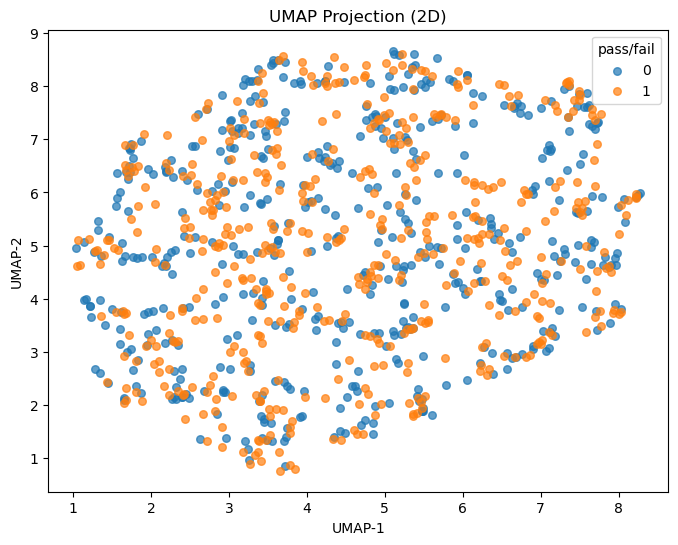

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap

# Select numeric feature data and exclude id (identifier) and pass/fail (prediction task)
X = df.select_dtypes(include=["number"]).drop(columns=["id", "pass/fail"])
print("Selected columns for UMAP:", list(X))
# Scale before embedding
X_scaled = StandardScaler().fit_transform(X)
# UMAP embedding (reduce 6 features into 2D embeddings)
embedding = umap.UMAP(random_state=42).fit_transform(X_scaled)
# Apply labels (pass/fail)
labels = df["pass/fail"]

# Plot
plt.figure(figsize=(8,6))
for lab in np.unique(labels):
    mask = labels == lab
    plt.scatter(embedding[mask, 0], embedding[mask, 1], s=30, alpha=0.7, label=str(lab))
plt.legend(title="pass/fail")
plt.title("UMAP Projection (2D)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction method that is both fast and scalable, making it effective even for large datasets. UMAP constructs a high-dimensional graph of the data based on relationships similar to *k*-nearest neighbors, and then optimizes a corresponding low-dimensional graph that preserves local structure. This allows the data to be visualized in two dimensions while retaining meaningful similarities between points.

In this analysis, six numeric features were used: `funding_per_student_usd`, `student_teacher_ratio`, `percent_low_income`, `percent_minority`, `internet_access_percent`, and `dropout_rate_percent`. These features were standardized to remove scale bias, and each school was represented as a single data point in a six-dimensional space. UMAP then reduced these feature vectors into two dimensions, and the `pass/fail` column was used only for coloring the points in the 2D plot to assess how well the features align with the outcome.

The resulting UMAP plot shows that the data points for pass and fail outcomes overlap considerably, indicating that the selected features do not produce a strong separation between the two groups. This is expected because educational outcomes such as pass/fail are influenced by many additional factors (e.g., teaching quality, curriculum, community support, and individual student characteristics) that are not included in the dataset. The overlap suggests that while these six features may carry some information related to pass/fail, they are insufficient on their own to clearly distinguish the two outcomes.
